In [1]:
import torch
from torch import nn
import torch.utils.data as Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from preprocessing import StandardScaler, Split
from model import Regressor

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
timesteps = 90
end = 60

In [3]:
df = pd.read_csv('bdi.csv')
df.fillna(method='ffill', inplace=True)
data = df['bdi'].values

In [4]:
x = []
y = []
for i in range(timesteps, data.shape[0]):
    x.append(data[i-timesteps:i])
    y.append(data[i])
x = np.array(x).reshape(-1, 45, 1, 2)
y = np.array(y).reshape(-1, 1)

In [5]:
x_train, y_train, x_val, y_val, x_test, y_test = Split(x, y)

In [6]:
scaler = StandardScaler(y_train)
x_train = scaler.transform(x_train)
y_train = scaler.transform(y_train)
x_val = scaler.transform(x_val)
y_val = scaler.transform(y_val)
x_test = scaler.transform(x_test)

In [7]:
x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.FloatTensor(y_train).to(device)
x_val = torch.FloatTensor(x_val).to(device)
y_val = torch.FloatTensor(y_val).to(device)
x_test = torch.FloatTensor(x_test).to(device)

In [8]:
model = Regressor().to(device)
model = torch.load('checkpoint.pt')

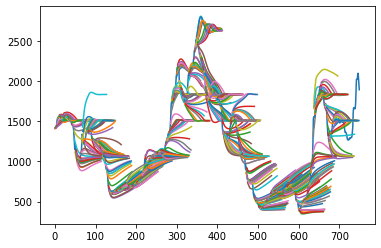

In [9]:
plt.plot(y_test)
table = []
for i in range(750-end):
    start = i
    tmp = x_test[start].unsqueeze(0)
    ls = []
    model.eval()
    for _ in range(end):
        with torch.no_grad():
            pred = model(tmp)
            ls.append(pred.cpu().numpy())
            tmp = torch.cat((tmp.view(-1, 1), pred))
            tmp = tmp[-timesteps:]
            tmp = tmp.view(1, 45, 1, 2)
    pred = scaler.inverse_transform(np.array(ls).reshape(-1))
    plt.plot(range(start, start+end),pred)
    table.append(metrics.mean_absolute_error(pred, y_test[start:start+end]))
plt.show()

In [10]:
for i in table:
    print(i)
print(np.mean(table))

125.52330322265625
129.847119140625
142.88109944661457
154.50497233072917
151.4436787923177
156.2431844075521
157.25856119791666
159.24193929036457
165.15584920247395
168.89657389322917
172.85834757486978
176.10688273111978
176.84966227213542
183.5010538736979
190.80064697265624
195.34219767252605
198.2884501139323
201.11609903971353
203.36748657226562
206.94374186197916
210.63191935221354
207.90039672851563
224.05669148763022
208.32930704752604
204.0926534016927
218.47125244140625
213.02509765625
211.9542215983073
210.61982218424478
218.14356892903646
216.62701212565105
219.3107137044271
227.33451131184896
231.60645955403646
226.76446533203125
230.94222615559895
234.3231424967448
238.2973388671875
242.0760925292969
246.49603678385418
250.23441365559896
250.22980143229168
234.42689005533853
228.42803141276042
241.54478759765624
249.74234822591146
186.13782145182293
149.16654052734376
191.57662760416667
211.37273559570312
265.0712178548177
228.78524373372395
206.05986735026042
218.22362